# Introduction to data plotting for the mini project



In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import random
%matplotlib inline

## Basic plotting functions

Here we will see how to use some matplotlib functions to visualize our data. 

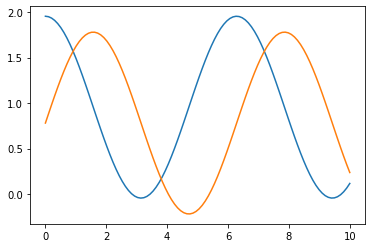

In [264]:
# Create an artificial data 
t = np.linspace(0,10,100)
x, y = np.cos(t) + np.random.rand() , np.sin(t) + np.random.rand()

# Plot the data
plt.plot(t, x)
plt.plot(t, y)
plt.show()

**This plot is missing some important characteristics that every plot should have:**
1. Legends: what do blue and orange lines denote? 
2. Labels: what does this data represent and what are the units? (time(sec) versus current(A) etc.) 
3. Title: what does this plot tell us in general? 

**Note:** We always need to make sure that our figure is big enough to be readable. 

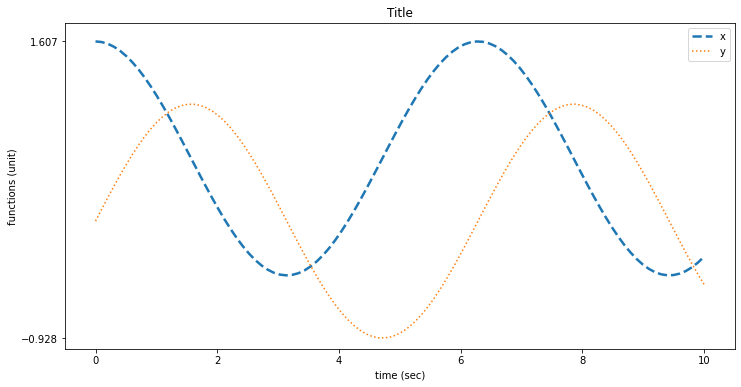

In [43]:
# Let's address the points above

fig, ax = plt.subplots(figsize = (12,6))

ax.plot(t, x, linewidth=2.5, linestyle="--", label = 'x')
ax.plot(t, y, linewidth=1.5, linestyle=":", label= 'y')

ax.set_ylabel('functions (unit)')
ax.set_xlabel('time (sec)')
ax.set_title('Title')

plt.ylim(min(x.min(), y.min()) * 1.1, max(x.max(), y.max()) * 1.1)
plt.yticks([min(x.min(), y.min()), max(x.max(), y.max())])

plt.legend(loc='upper right')

plt.show()

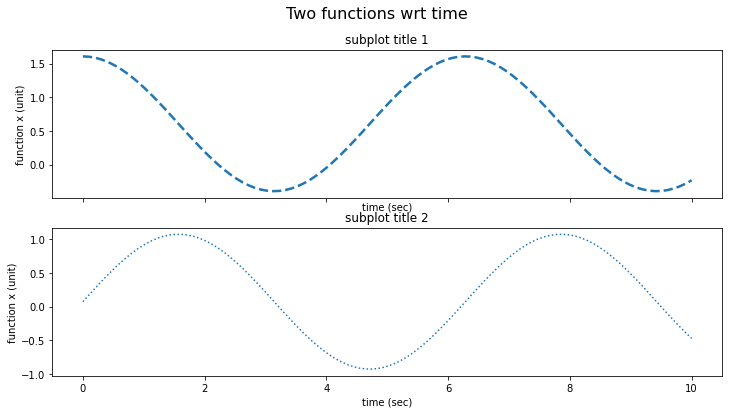

In [29]:
# Let's make two subplots inside a figure

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6), sharex = True)
fig.suptitle('Two functions wrt time', fontsize = 16)

ax[0].plot(t, x, linewidth=2.5, linestyle="--")
ax[0].set_ylabel('function x (unit)')
ax[0].set_xlabel('time (sec)')
ax[0].set_title('subplot title 1')


ax[1].plot(t, y, linewidth=1.5, linestyle=":")
ax[1].set_ylabel('function x (unit)')
ax[1].set_xlabel('time (sec)')
ax[1].set_title('subplot title 2')

#plt.savefig('example.png')
plt.show()

We sometimes want to make figures with more complex geometry. In such cases, subplot2grid is a more powerful tool than subplot. 

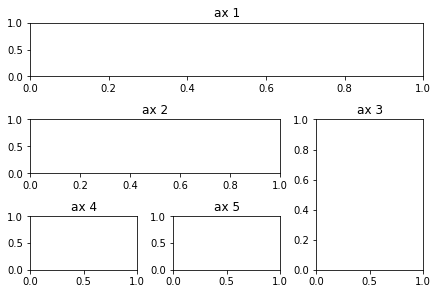

In [48]:
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.set_title('ax 1')

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2.set_title('ax 2')

ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.set_title('ax 3')

ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.set_title('ax 4')

ax5 = plt.subplot2grid((3, 3), (2, 1))
ax5.set_title('ax 5')

# Set a vertical and horizontal space between subplots
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

## Computing statistics of your time series data
When random samples are taken from a population, their mean will vary from one cluster of samples to another. This variation depends on the variation of the population, and how big the population is. To estimate the variation of the population, we measure the differences of each observation from the mean, which is called **standard deviation**. Standard deviation **divided** by the squareroot of the sample size is called **standard error of the mean**. As the sample size increases, standard error of the mean gets closer to the real mean of the population. 

**95% confidence interval** gives the range of values that contains the true value of the parameter with a probability 0.95. **Confidence interval does not give quantify variability in the data.**

After calculating the variability of your data (standard deviation, standard error etc.), you can visualize it with as the following:

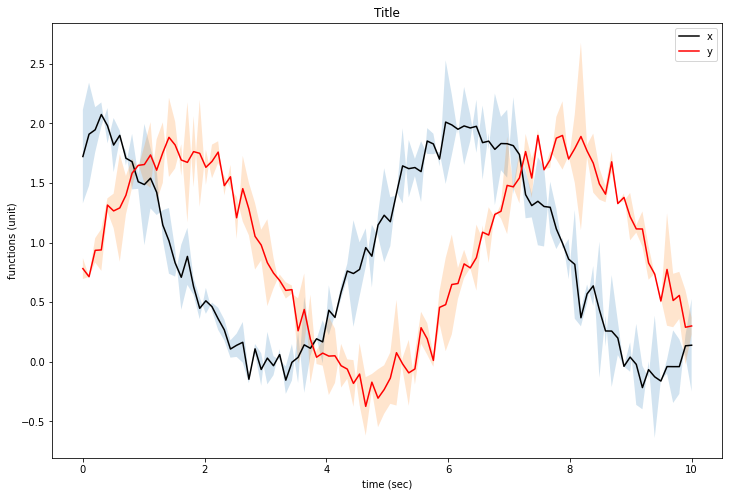

In [268]:
# Plot error margin 
error_x = np.random.normal(0.1, 0.2, size=x.shape)
x += np.random.normal(0, 0.1, size=x.shape)

error_y = np.random.normal(0.1, 0.2, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(t, x, 'k-', label = 'x')
ax.plot(t, y, 'r-', label = 'y')
ax.fill_between(t, x-error_x, x+error_x, alpha = 0.2)
ax.fill_between(t, y-error_y, y+error_y, alpha = 0.2)

ax.set_ylabel('functions (unit)')
ax.set_xlabel('time (sec)')
ax.set_title('Title')

plt.legend()
plt.show()

When using the dimensionality reduction methods, i.e. **PCA and t-SNE**, we oftentimes need to visualize the dataset with the new dimensions to assess if, for example, behavioral clustering has been successful. For that, we need **scatter plots**.

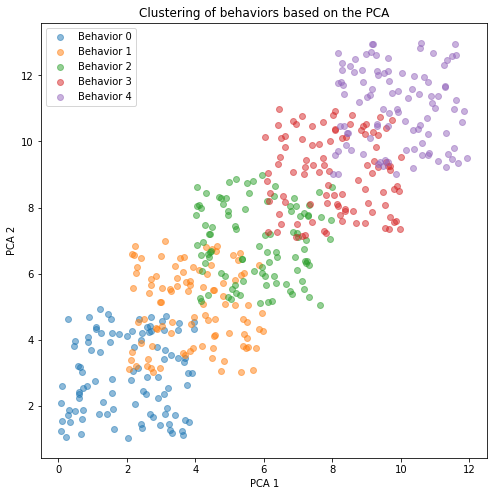

In [415]:
# Let's create a random matrix that supposedly has the clustered results of the behavior
behavioral_dataset = []
for i in range(10):
    beh = [i + 4*np.random.rand() for a in range(100)]
    behavioral_dataset.append(beh)

behavioral_dataset = np.array(behavioral_dataset)

fig, ax = plt.subplots(figsize = (8,8))

for i in range(0,10,2):
    ax.scatter(behavioral_dataset[i, :], behavioral_dataset[i + 1, :], label = 'Behavior ' + str(int(i*0.5)), alpha = .5)
    
ax.legend()
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Clustering of behaviors based on the PCA')

plt.show()

## Plot statistics

**Data set:** Finishers of Boston Marathon in 2015, 2016, and 2017

**GOAL:** Compare the finishing times of the three marathons

In [244]:
# Load the data
data_2015 = pd.read_csv('marathon_results_2015.csv')
data_2016 = pd.read_csv('marathon_results_2016.csv')
data_2017 = pd.read_csv('marathon_results_2017.csv')

# Assign the years
years = ['2015', '2016', '2017']

In [ ]:
# Always have a look through your data 
data_2015

In [241]:
def get_sec_official_time(x):
    h, m, s = x['Official Time'].split(':')
    return (int(h) * 3600 + int(m) * 60 + int(s))/(60.0*60)

In [237]:
data_2015['Official Time'] = data_2015.apply(get_sec_official_time, axis = 1)
data_2016['Official Time'] = data_2016.apply(get_sec_official_time, axis = 1)
data_2017['Official Time'] = data_2017.apply(get_sec_official_time, axis = 1)

In [136]:
# Make a new data frame 
data_raw = [data_2015['Official Time'], data_2016['Official Time'], data_2017['Official Time']]
data_mean = [data_2015['Official Time'].mean(), data_2016['Official Time'].mean(), data_2017['Official Time'].mean()]
data_std = [data_2015['Official Time'].std(), data_2016['Official Time'].std(), data_2017['Official Time'].std()]

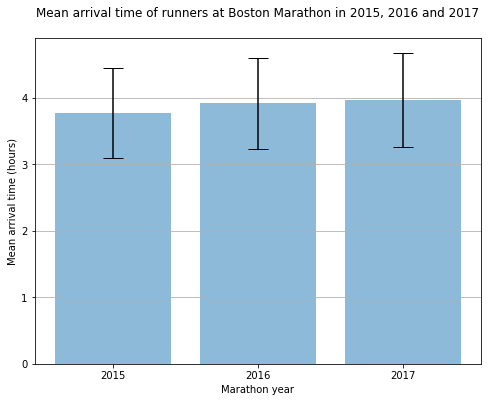

In [162]:
# Build the bar plot
fig, ax = plt.subplots(figsize = (8,6))
ax.bar(np.arange(3), data_mean,
       yerr = data_std,
       align = 'center',
       alpha = 0.5,
       ecolor = 'black',
       capsize = 10)
ax.set_ylabel('Mean arrival time (hours)')
ax.set_xlabel('Marathon year')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['2015', '2016', '2017'])
#ax.set_title('')
ax.yaxis.grid(True)
# Save the figure and show
plt.title('Mean arrival time of runners at Boston Marathon in 2015, 2016 and 2017\n')

#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

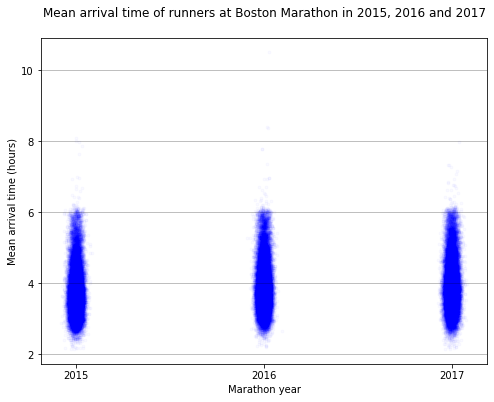

In [185]:
# Plot the raw data 
fig, ax = plt.subplots(figsize = (8,6))
for i, data in enumerate(data_raw):
    x = np.random.normal(i, 0.02, size=len(data))
    plt.plot(x, data, 'b.', alpha=0.02) 
    
ax.set_ylabel('Mean arrival time (hours)')
ax.set_xlabel('Marathon year')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['2015', '2016', '2017'])
#ax.set_title('')
ax.yaxis.grid(True)
# Save the figure and show
plt.title('Mean arrival time of runners at Boston Marathon in 2015, 2016 and 2017\n')

#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

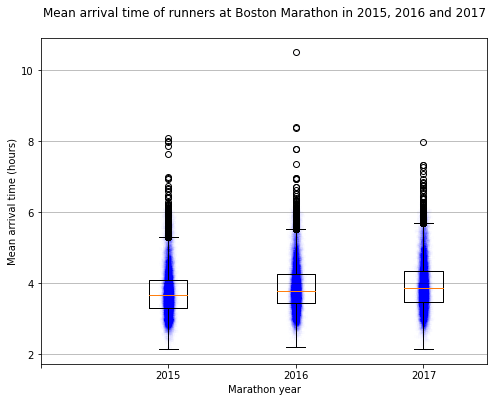

In [184]:
# Plot the raw data and add box plot on top of it
fig, ax = plt.subplots(figsize = (8,6))

for i, data in enumerate(data_raw):
    x = np.random.normal(i+1, 0.02, size=len(data))
    plt.plot(x, data, 'b.', alpha=0.002) 

ax.boxplot(data_raw)

ax.set_ylabel('Mean arrival time (hours)')
ax.set_xlabel('Marathon year')
ax.yaxis.grid(True)

plt.xticks(np.arange(4), ('', '2015', '2016', '2017'))
plt.title('Mean arrival time of runners at Boston Marathon in 2015, 2016 and 2017\n')

# Save the figure and show
#plt.savefig('box_plot_with_datapoints.png')
plt.show()

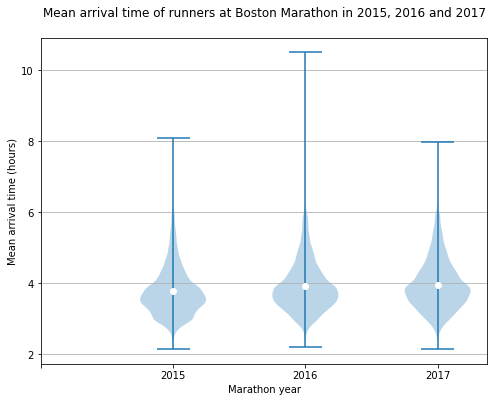

In [176]:
# Plot the raw data and add violin plot on top of it
fig, ax = plt.subplots(figsize = (8,6))

for i, data in enumerate(data_mean):
    plt.plot(i+1, data, 'o', color = 'white')

ax.violinplot(data_raw, showmeans = False, showmedians = False, showextrema = True)

ax.set_ylabel('Mean arrival time (hours)')
ax.set_xlabel('Marathon year')
ax.yaxis.grid(True)

plt.xticks(np.arange(4), ('', '2015', '2016', '2017'))
plt.title('Mean arrival time of runners at Boston Marathon in 2015, 2016 and 2017\n')

# Save the figure and show
#plt.savefig('violin_plot.png')
plt.show()

## Other ways to make plots showing the statistical features: 
1. https://seaborn.pydata.org/index.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

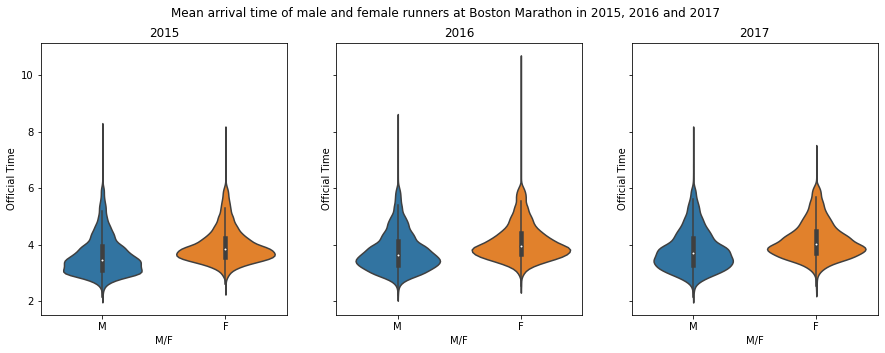

In [223]:
# Example using seaborn
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Mean arrival time of male and female runners at Boston Marathon in 2015, 2016 and 2017\n')

sns.violinplot(ax = axes[0], y='Official Time', x="M/F", data=data_2015)
axes[0].set_title('2015')

sns.violinplot(ax = axes[1], y='Official Time', x="M/F", data=data_2016)
axes[1].set_title('2016')

sns.violinplot(ax = axes[2], y='Official Time', x="M/F", data=data_2017)
axes[2].set_title('2017')

# Save the figure and show
#plt.savefig('violin_plot_gender.png')
plt.show()

## Going back to the COBAR dataset 

In [272]:
neural_data = pd.read_pickle('./COBAR_neural.pkl')
beh_data = pd.read_pickle('./COBAR_behaviour.pkl')

In [273]:
neural_data

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

In [275]:
# You can eaasily access the statistics of 
neural_data.describe()

,t,neuron_0,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,...,neuron_113,neuron_114,neuron_115,neuron_116,neuron_117,neuron_118,neuron_119,neuron_120,neuron_121,neuron_122
count,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,...,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000,48480.000000
mean,126.170360,1274.144160,598.582547,1375.892288,1806.390390,1732.486809,1517.272262,1580.754190,1866.607132,1589.632989,...,1080.914694,1405.115138,1180.858313,906.430824,559.634374,914.253305,791.697093,482.472411,1221.753496,1180.062767
std,71.796860,486.139194,324.181815,657.487653,850.645656,522.929444,515.838961,312.822401,872.885903,340.366819,...,172.928854,460.165832,170.271541,271.117616,222.666670,303.451805,163.591557,202.750934,426.116718,252.806299
min,1.846767,290.806152,124.003415,286.695024,351.245775,532.239744,628.673205,917.345122,366.686604,764.548163,...,589.069729,494.685125,637.754767,284.920711,157.948557,285.911406,295.947794,149.098183,382.232845,511.338089
25%,64.006908,867.532645,368.210300,823.832836,1068.031444,1262.476692,1083.004741,1346.176203,1142.051897,1351.172703,...,968.815541,1046.816253,1062.878694,683.044253,405.429190,693.715799,683.234315,328.735052,877.218587,1012.892919
50%,126.169900,1239.769886,509.999992,1278.367643,1762.130469,1824.131614,1438.585728,1510.589572,1773.502267,1568.661760,...,1066.808428,1272.187389,1166.794594,898.476265,490.720732,869.443716,776.816394,427.755573,1167.825407,1143.548618
75%,188.335525,1634.566796,747.200420,1790.994086,2436.489221,2145.559719,1862.847971,1752.676118,2439.126824,1806.971279,...,1169.392131,1786.944771,1277.140646,1103.358231,660.028762,1091.867033,874.457169,597.237542,1511.786998,1287.784689
max,250.503733,2868.981181,2365.198728,4325.374103,4755.456971,3014.950335,3481.953175,2785.337333,5222.704346,3315.615957,...,2360.992003,2794.704465,2289.512743,1737.429825,1544.738184,2302.376990,1684.608433,1526.943130,2931.423143,3603.748426


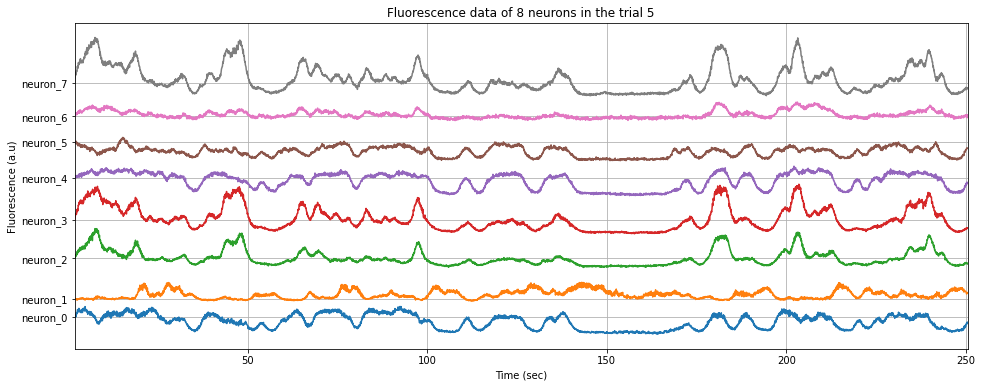

In [338]:
neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]

neuron_names = ['neuron_' + str(i) for i in range(8)]
ytick = []

fig, ax = plt.subplots(figsize = (16,6))

for i, neuron in enumerate(neuron_names):   
    ax.plot(neural_signals_trial_5['t'], i*2500 + neural_signals_trial_5[neuron], label = neuron)
    ytick.append(neural_signals_trial_5[neuron].iloc[0] + i*2500)
    
ax.set_ylabel('Fluorescence (a.u)')
ax.set_xlabel('Time (sec)')
ax.set_title('Fluorescence data of 8 neurons in the trial 5')

ax.set_xlim(neural_signals_trial_5['t'].min(), neural_signals_trial_5['t'].max())

plt.yticks(np.array(ytick), neuron_names)
#plt.legend()
plt.grid()
plt.show()

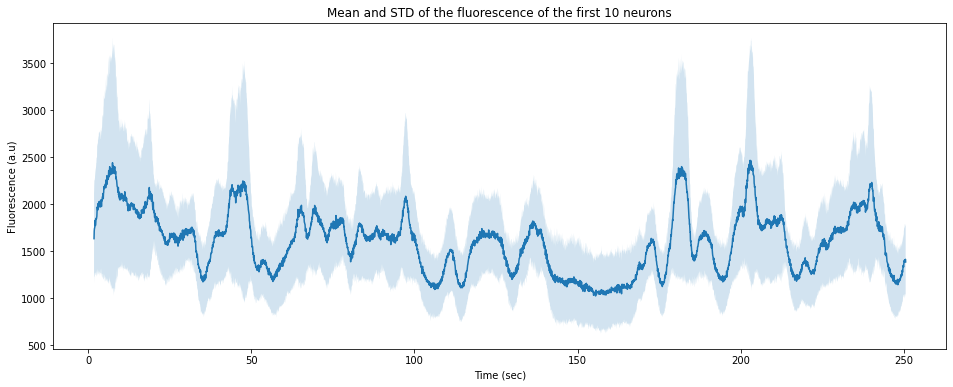

In [345]:
# Let's look at population of neurons now 

# Select the first 10 neurons 
# QUESTION: How does plot change when you plot the mean of 50 neurons? What about std error of the mean?
neuron_no = 10 
neurons_first_ten = neural_signals_trial_5.iloc[:,:2 + neuron_no]
mean = neurons_first_ten.iloc[:,2:2 + neuron_no].mean(axis=1)
std = neurons_first_ten.iloc[:,2:2 + neuron_no].std(axis=1)

fig, ax = plt.subplots(figsize = (16,6))

ax.plot(neurons_first_ten['t'], mean)
ax.fill_between(neurons_first_ten['t'], mean - std, mean + std, alpha = 0.2)

ax.set_ylabel('Fluorescence (a.u)')
ax.set_xlabel('Time (sec)')
ax.set_title('Mean and STD of the fluorescence of the first 10 neurons')

plt.show()

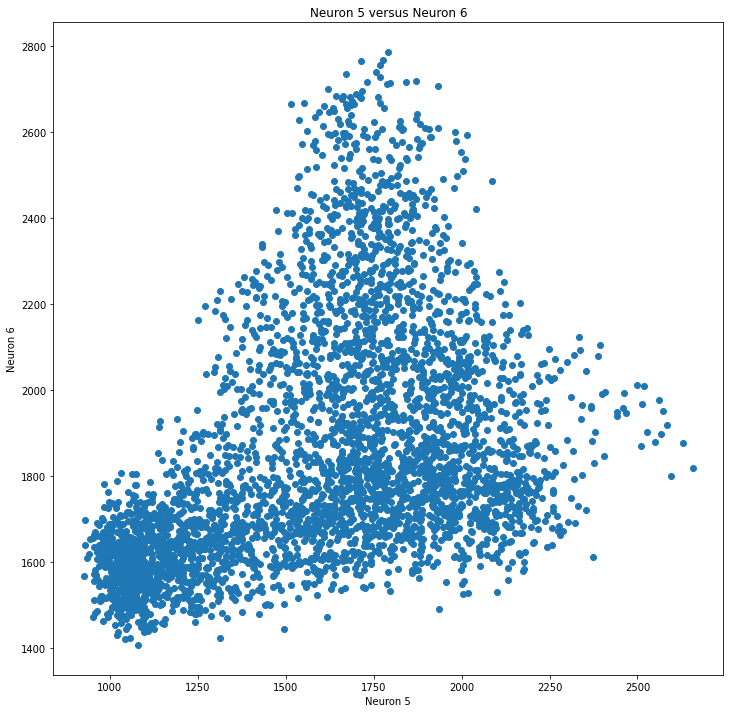

In [398]:
# Apply scatter plot to neuron 0 and neuron 1 data

fig, ax = plt.subplots(figsize = (12,12))

plt.scatter(neural_signals_trial_5['neuron_5'], neural_signals_trial_5['neuron_6'])

ax.set_ylabel('Neuron 6')
ax.set_xlabel('Neuron 5')
ax.set_title('Neuron 5 versus Neuron 6')

#ax.set_xlim(0,3500)
#ax.set_ylim(0,3500)

plt.show()

In [346]:
beh_data

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [371]:
beh_signals_trial_5 = beh_data[beh_data.index.get_level_values("Trial")==5]

In [372]:
beh_signals_trial_5

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   5     0        0.000133 -9223372036854775808   
                          1        0.010133 -9223372036854775808   
                          2        0.020133 -9223372036854775808   
                          3        0.030133 -9223372036854775808   
                          4        0.040133 -9223372036854775808   
...                                     ...                  ...   
                          25195  251.794500 -9223372036854775808   
                          25196  251.804500 -9223372036854775808   
                          25197  251.814500 -9223372036854775808   
                          25198  251.824500 -9223372036854775808   
                          25199  251.834467 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   5     0                   0.345735           0.418903   
                          1                   0.345735           0.418903   
                          2                   0.345735           0.418903   
                          3                   0.345735           0.418903   
                          4                   0.345735           0.418903   
...                                                ...                ...   
                          25195               0.428208           0.375699   
                          25196               0.457501           0.395483   
                          25197               0.457501           0.395483   
                          25198               0.428208           0.375699   
                          25199               0.457501           0.395483   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   5     0                   -0.430634           -2.228500   
                          1                   -0.428804           -2.249327   
                          2                   -0.430634           -2.228500   
                          3                   -0.430634           -2.228500   
                          4                   -0.428804           -2.249327   
...                                                 ...                 ...   
                          25195               -0.297973           -2.071966   
                          25196               -0.308317           -2.076785   
                          25197               -0.302689           -2.095646   
                          25198               -0.292721           -2.090990   
                          25199               -0.302689           -2.095646   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   5     0                1.457544                -0.020670   
                          1                1.483006                -0.021579   
                          2                1.457544                -0.020670   
                          3                1.457544                -0.020670   
                          4                1.483006                -0.021579   
...                                             ...                      ...   
                          25195            1.515952                -0.030194   
                          25196            1.499208                -0.037308   
                          25197            1.518699                -0.036264   
                          25198            1.535437                -0.031268   
                          25199            1.518699                -0.036264   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

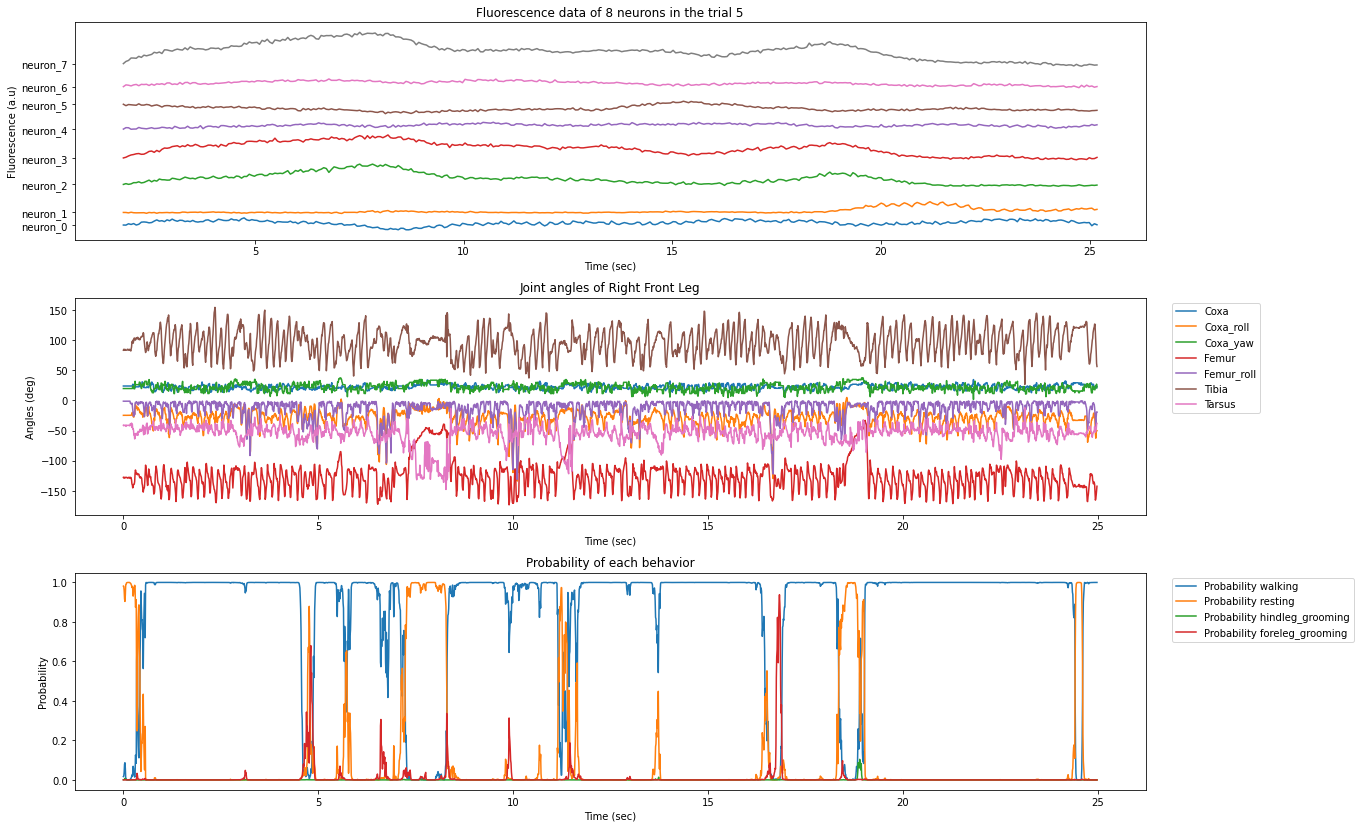

In [418]:
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
plt.figure(figsize=(19,15))

# ================= PLOT 1 =================
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=4, rowspan = 1)
neuron_names = ['neuron_' + str(i) for i in range(8)]
ytick = []
for i, neuron in enumerate(neuron_names):   
    ax1.plot(neural_signals_trial_5['t'].iloc[:380], i*2500 + neural_signals_trial_5[neuron].iloc[:380], label = neuron)
    ytick.append(neural_signals_trial_5[neuron].iloc[0] + i*2500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data of 8 neurons in the trial 5')

ax1.set_yticks(np.array(ytick))
ax1.set_yticklabels(neuron_names)

# ================= PLOT 2 =================
ax2 = plt.subplot2grid((4, 4), (1, 0), colspan=4)

joints = ['Coxa', 'Coxa_roll', 'Coxa_yaw', 'Femur', 'Femur_roll', 'Tibia', 'Tarsus']
leg_joints = ['angle_RF_leg_' + joint for joint in joints]

for i, joint in enumerate(leg_joints):   
    ax2.plot(beh_signals_trial_5['t'].iloc[:2500], beh_signals_trial_5[joint].iloc[:2500]*180/np.pi, label = joints[i])

ax2.set_title('Joint angles of Right Front Leg')
ax2.set_ylabel('Angles (deg)')
ax2.set_xlabel('Time (sec)')
ax2.legend(bbox_to_anchor = (1.02,1))

# ================= PLOT 2 =================
ax3 = plt.subplot2grid((4, 4), (2, 0), colspan=4)

for i in range(1,5):
    ax3.plot(beh_signals_trial_5['t'].iloc[:2500], beh_signals_trial_5.iloc[:2500,-i], label = beh_signals_trial_5.iloc[:,-i].name)


ax3.set_title('Probability of each behavior')
ax3.set_ylabel('Probability')
ax3.set_xlabel('Time (sec)')
ax3.legend(bbox_to_anchor = (1.02,1))

plt.tight_layout()
plt.show()

### Plotting pose estimates in 3D 
You need to install DeepFly3D and check this notebook out https://github.com/NeLy-EPFL/DeepFly3D/blob/master/notebook_visualize/draw_row5.ipynb

You will be provided with the DeepFly3D pose estimation output file.